# **Media Campaigns In Food Mart of USA**

## Objectives:

<font size = '4'>To analyze the data and build a linear regression model that can predict the media campains in food-mart of USA and its significance.<font/>

##    **Key Questions:**
    
1.  <font size = '4'> What is the distribution of store sales (in millions) across different food categories?<font/>
2.  <font size = '4'> What are the specific promotions that significantly impact store sales?<font/>
3.  <font size = '4'> What is the relationship between product weight (gross and net) and sales?<font/>
4.  <font size = '4'> What is the correlation between store cost and store sales?<font/>
5.  <font size = '4'> Analyze store sales across various countries?<font/>    6.  <font size = '4'> Explore the sales distribution based on gender, marital status and education? <font/>
7.  <font size = '4'> How do promotional activities impact unit sales<font/>
8.  <font size = '4'> Explore store sales across different cities and states.<font/>
9.  <font size = '4'> Identify any cost outliers in the dataset?<font/>
10. <font size = '4'> Investigate the cost distribution among different brands and SRP levels.<font/>
11. <font size = '4'> What is the sales distribution by membership status?<font/>
12. <font size = '4'> What is the effectiveness of promotions across media types?<font/>

## Importing Necessary Libraries

<font size = '4'> We will import packages for the analysis.<font/>

In [2]:
# importing packages

import numpy as np      # for numerical computation
import pandas as pd     # for data reading

import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns            # for data visualization

from tabulate import tabulate    # to print the table
import matplotlib as mat         # for data visualization

## Importing data


<font size = '4'>Here we will import Cost Prediction on Acquiring Customers CSV data<font/>

In [3]:
# import data

%pwd


'C:\\Users\\Gayatri Nilayam'

In [4]:
%cd "C:\Users\Gayatri Nilayam\Desktop\DataSets\Cost Prediction on Acquiring Customers"

C:\Users\Gayatri Nilayam\Desktop\DataSets\Cost Prediction on Acquiring Customers


In [5]:
data = pd.read_csv("media prediction and its cost.csv")

# Data Overview and Understanding

<font size = '4'>We will check structure and summary of data before analysing</font>

## Reading First Five Observations

In [6]:
# Checking first five observations of dataset with head

pd.set_option('display.max_columns', None)
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,Carrington,1.84,19.70,17.70,Y,N,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,Available,Available,Available,Available,Available,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,4,Carrington,1.84,19.70,17.70,Y,N,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,Available,Available,Available,Available,Available,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,1,Carrington,1.84,19.70,17.70,Y,N,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,Available,Available,Available,Available,Available,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,2,Carrington,1.84,19.70,17.70,Y,N,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,Available,Available,Available,Available,Available,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Golden,1.36,7.12,5.11,N,Y,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,Available,Available,Available,Available,Available,Radio,50.79


## Reading Last Five Observations

In [7]:
# Checking last five observations of dataset with tail

pd.set_option('display.max_columns', None)
data.tail()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1,You Save Days,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,ADJ,2.76,19.6,18.6,Y,N,26,Small Grocery,San Francisco,CA,22478,15321,4294,2863,Available,Not Available,Not Available,Not Available,Not Available,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1,Price Cutters,USA,S,F,2,High School Degree,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Symphony,1.60,17.4,15.3,Y,N,36,Small Grocery,San Francisco,CA,22478,15321,4294,2863,Available,Not Available,Not Available,Not Available,Not Available,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2,Weekend Markdown,USA,M,M,1,High School Degree,Bronze,Manual,Y,3,$30K - $50K,0,3,ADJ,2.76,19.6,18.6,Y,N,26,Small Grocery,San Francisco,CA,22478,15321,4294,2863,Available,Not Available,Not Available,Not Available,Not Available,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3,Sales Days,Canada,S,M,2,Bachelors Degree,Bronze,Professional,N,4,$70K - $90K,0,4,ADJ,2.76,19.6,18.6,Y,N,26,Mid-Size Grocery,Victoria,BC,34452,27463,4193,2795,Available,Not Available,Not Available,Not Available,Available,Sunday Paper,132.88
60427,Specialty,Carousel,Non-Consumable,9.20,4.2320,4,Super Duper Savers,Canada,S,F,3,Partial High School,Bronze,Manual,Y,1,$10K - $30K,0,1,Prelude,2.30,21.5,19.5,Y,N,29,Mid-Size Grocery,Victoria,BC,34452,27463,4193,2795,Available,Not Available,Not Available,Not Available,Available,"Daily Paper, Radio",87.76


## Understanding Data Attributes

In [17]:
# understanding of data attributes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

### **Observations:**

-  <font size = '4'> Data has 60428 observations and 40 variables.<font/>
-  <font size = '4'> 24 variables are object and 16 variables are numeric data types.<font/>
-  <font size = '4'> There are no missing values in the dataset.<font/>
-  <font size = '4'>Columns tied with "int64" and "float64" denotes numerical data while data type "object" denotes categorical data type.<font/>

## Checking for Duplicates

In [18]:
# checking duplicates

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
60423    False
60424    False
60425    False
60426    False
60427    False
Length: 60428, dtype: bool

## Finding Missing Values

In [19]:
# checking the missing values from each column in the dataset

data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

## **Observations:**



<font size = '4'>       There are no missing values observed in this dataset.<font/>

## Displaying the Columns Names

In [10]:
# Displaying all the column names

print("Displaying all the column names:", "\n", data.columns)

Displaying all column names: 
 Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')


## Checking the number of Unique Values

In [21]:
# checking the number of unique values of each column in the dataframe

data.nunique()

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

## **Observations:**

-  <font size = '4'> The store cost column has more number of unique values i.e., 9919.<font/>
-  <font size = '4'> The store sales column has 1033 unique values.<font/>
-  <font size = '4'> The gender column has 2 unique values i.e., "Yes" or "No".<font/>

# Describing the Dataset

## Descriptive details of Numeric data

In [14]:
# Descriptive details of numeric data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
total_children,60428.0,2.533875,1.490165,0.0000,1.00,3.0000,4.000000,5.0000
avg_cars_at home(approx),60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
num_children_at_home,60428.0,0.829351,1.303424,0.0000,0.00,0.0000,1.000000,5.0000
avg_cars_at home(approx).1,60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000


## **Observations:**

-  <font size = '4'> There are 16 numerical variables in the data.<font/>
-  <font size = '4'> The average store sales is 6.5 millions and maximum store sales is 23 millions.<font/>
-  <font size = '4'> Average unit sales is 3 millions and maximum unit sales is 6 millions.<font/>
-  <font size = '4'> The standard deviation of gross weight is 4.622693 and net weight is 4.682986.<font/>
-  <font size = '4'> We need further investigation to see possible outliers in the data which we can further analyze through graphs and boxplot as per the requirement.<font/>

## Descriptive details of Categorical data

In [9]:
# Descriptive details of categorical data

data.describe(include = 'object').T

,count,unique,top,freq
food_category,60428,45,Vegetables,7440
food_department,60428,22,Produce,8521
food_family,60428,3,Food,43284
promotion_name,60428,49,Weekend Markdown,2330
sales_country,60428,3,USA,38892
marital_status,60428,2,S,30355
gender,60428,2,F,30942
education,60428,5,Partial High School,18201
member_card,60428,4,Bronze,33807
occupation,60428,5,Professional,19915


## **Observations:**

  <font size = '4'> Above results show the descriptive analysis of categorical data.<font/>
-  <font size = '4'> There are 45 types of food categories in the store.<font/>
-  <font size = '4'> The most frequently purchased food category is Vegetables.<font/>
-  <font size = '4'> There are 13 types of media type for media campaign.<font/>
-  <font size = '4'> The most frquently used media type for media campaign is Daily Paper and Radio.<font/>

## Seperating Categorical and Numerical data 

In [7]:
# Seperating categorical and numerical data 

def seperate_data(data):
    categorical = []
    continuous = []
    
    for columns in data.columns:
        
        if pd.api.types.is_numeric_dtype(data[columns]):
            
            continuous.append(columns)
            
        else:
            
            categorical.append(columns)
            
    return categorical, continuous

# calling data 
categorical, continuous  = seperate_data(data)  

In [8]:
# Tabulate - is used to print data in table format

table = [categorical, continuous]

print(tabulate({"Categorical":  categorical,
               "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical         continuous
------------------  --------------------------
food_category       store_sales(in millions)
food_department     store_cost(in millions)
food_family         unit_sales(in millions)
promotion_name      total_children
sales_country       avg_cars_at home(approx)
marital_status      num_children_at_home
gender              avg_cars_at home(approx).1
education           SRP
member_card         gross_weight
occupation          net_weight
houseowner          units_per_case
avg. yearly_income  store_sqft
brand_name          grocery_sqft
recyclable_package  frozen_sqft
low_fat             meat_sqft
store_type          cost
store_city
store_state
coffee_bar
video_store
salad_bar
prepared_food
florist
media_type


# Exploratory Data Analysis (EDA)

- <font size = '4'> EDA is an important part of any project involving data.<font/>
- <font size = '4'> It is important to investigate and understand the data better before building a model with it.<font/>
- <font size = '4'> A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.<font/>
- <font size = '4'> A thorough analysis of the data, in addition to the questions mentioned below, should be done.<font/>

# Univariate Analysis 

<font size = '4'> Univariate Analysis refers to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key is that there is only one variable involved in the analysis.<font/>

## Categorical Data

In [60]:
# Function to create labeled barplots and pie charts
def labeled_barplot(data, feature, perc=False, n=None, figsize=(15, 5)):

    total = len(data[feature])  # Total number of data points
    count = data[feature].nunique()  # Number of unique categories

    # Determine the number of subplots based on the conditions
    if count == 2:
        fig, ax_pie = plt.subplots(1, 1, figsize=figsize)
        show_pie = True
    else:
        fig, ax_bar = plt.subplots(1, 1, figsize=figsize)
        show_pie = False

    # Customize the x-axis ticks for better readability
    x_ticks_order = data[feature].value_counts().index[:n].sort_values()

    # Check if a pie chart should be generated
    if show_pie:
        # Create a pie chart
        ax_pie.pie(data[feature].value_counts(), labels=x_ticks_order, autopct='%1.1f%%', colors=sns.color_palette("Paired"))
        ax_pie.set_title(f'Pie Chart for {feature}')
    else:
        # Create a bar plot
        ax_bar = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=x_ticks_order,
            ax=ax_bar  # Specify the axis to ensure both plots are in the same figure
        )

        # Annotate each bar with the count or percentage
        for p in ax_bar.patches:
            if perc:
                label = "{:.1f}%".format(100 * p.get_height() / total)
            else:
                label = p.get_height()

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()

            ax_bar.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )

        # Customize the bar plot
        ax_bar.set_xticklabels(x_ticks_order, rotation=45, fontsize=12)
        ax_bar.set_title(f'Labeled Bar Plot for {feature}')
        ax_bar.set_xlabel(feature, fontsize=14)
        ax_bar.set_ylabel('Count' if not perc else 'Percentage', fontsize=14)

    plt.tight_layout()
    plt.show()

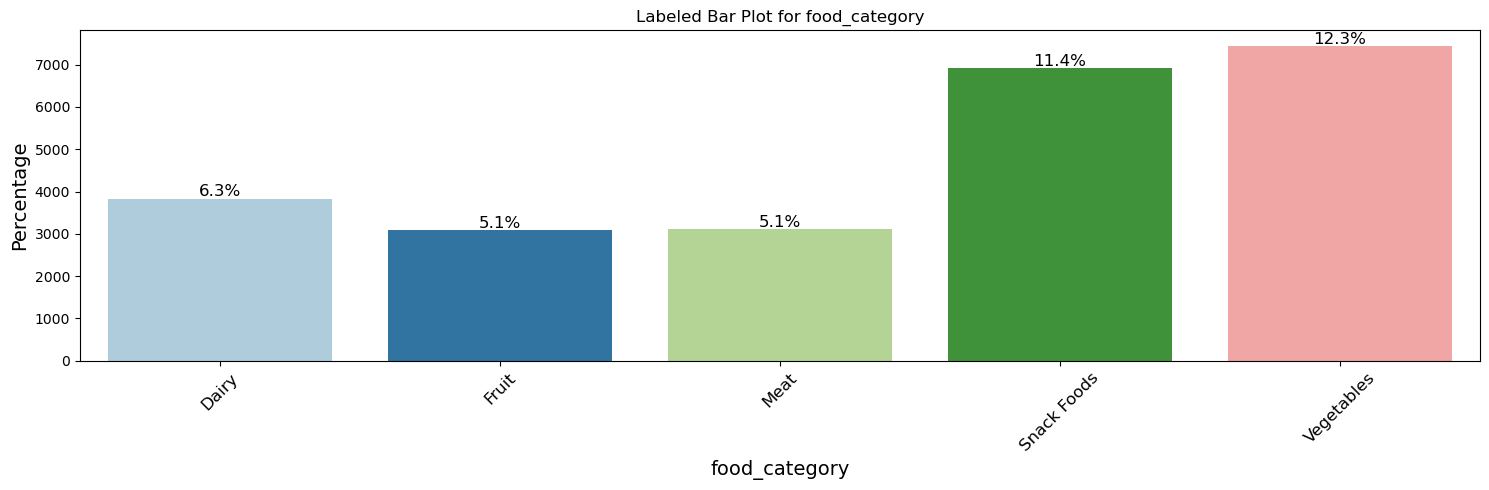

In [61]:
# food_category variable

labeled_barplot(data, 'food_category', perc=True, n=5)

## **Observations:**


<font size = '4'> The bar graph displays the total percentage of food categories, where Vegetables have the highest percentile ie., 12.3% followed by Snack Foods - 11.4% and Meat - 5.1%.<font/>

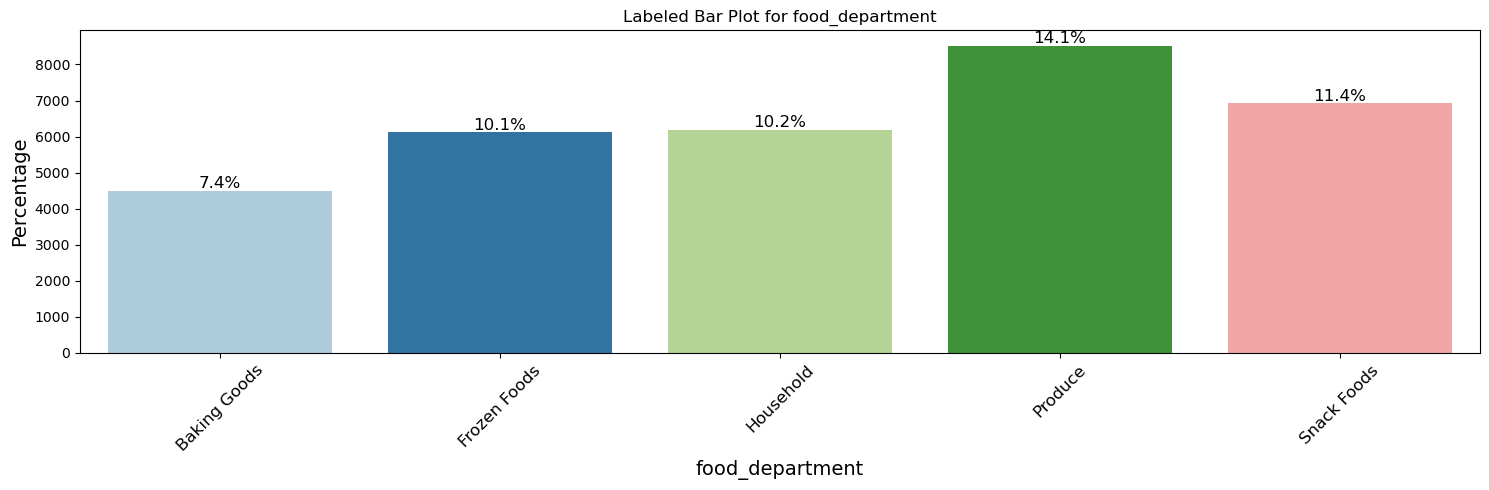

In [62]:
# food_department variable

labeled_barplot(data, 'food_department', perc=True, n=5)

## **Observations:**

<font size = '4'> The bar graph displays the total percentage of food department, The food department - Produced food got highest percentile ie., 14.1% followed by Snack Foods - 11.4% and Household food department - 10.2%.<font/>

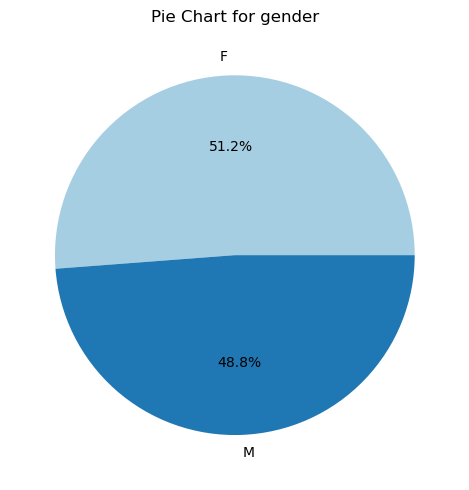

In [63]:
# gender variable

labeled_barplot(data, 'gender', perc=True, n=5)

## **Observations:**

<font size = '4'> The pie chart displays the gender percentile, where Female got 51.2% and male got 48.8%.<font/>

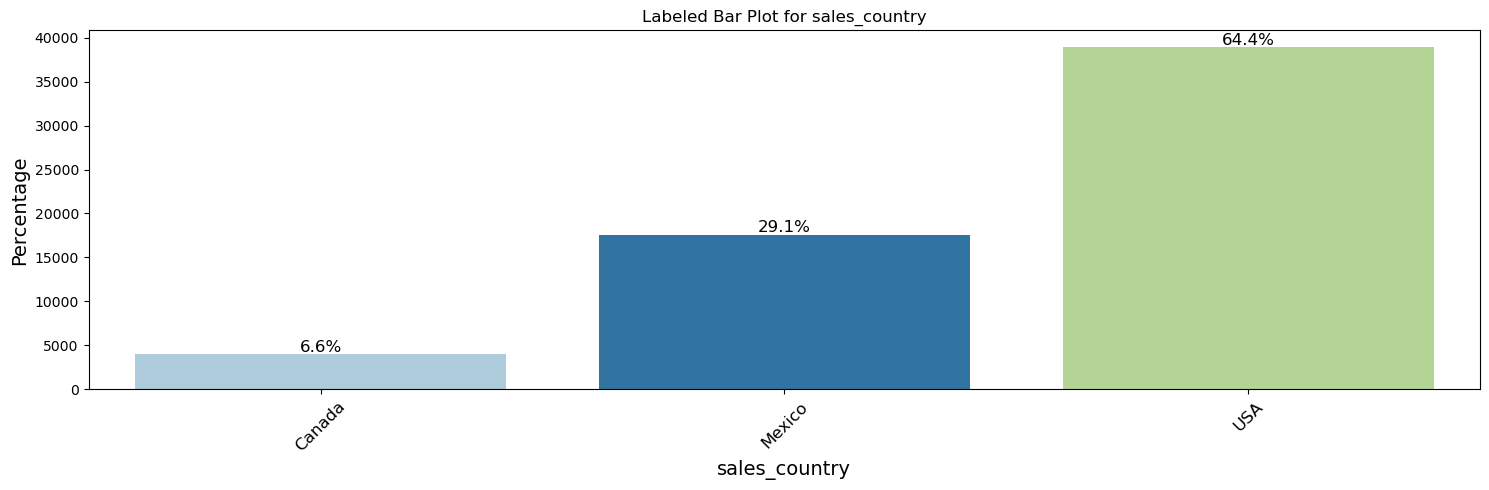

In [64]:
# sales_country variable

labeled_barplot(data, 'sales_country', perc=True, n=5)

## **Observations:**

<font size = '4'> The bar plot displays the country-wise sales, where USA got highest percentile - 64.4% followed by Mexico - 29.1% and Canada - 6.6%.<font/>

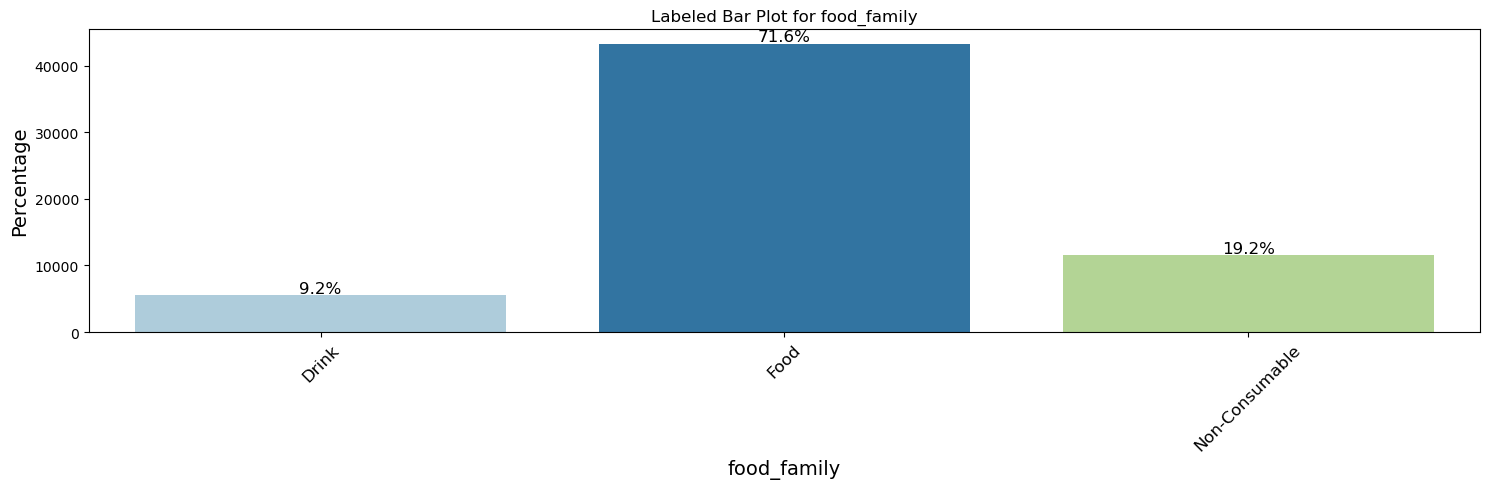

In [65]:
# food_family variable

labeled_barplot(data, 'food_family', perc=True, n=5)

## **Observations:**

<font size = '4'> The bar plot displays the food family percentage, where Food - 71.6% got highest percentile and Drink - 9.2% lowest percentile. <font/>

## Numerical Data

In [15]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 8), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.45, 0.95)},
        figsize=figsize)  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-")  # Add median to the histogram

    plt.show()

# Define your numerical columns
numerical_columns = [
    'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)',
    'avg. yearly_income', 'num_children_at_home', 'SRP', 'gross_weight',
    'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
    'meat_sqft', 'cost'
]




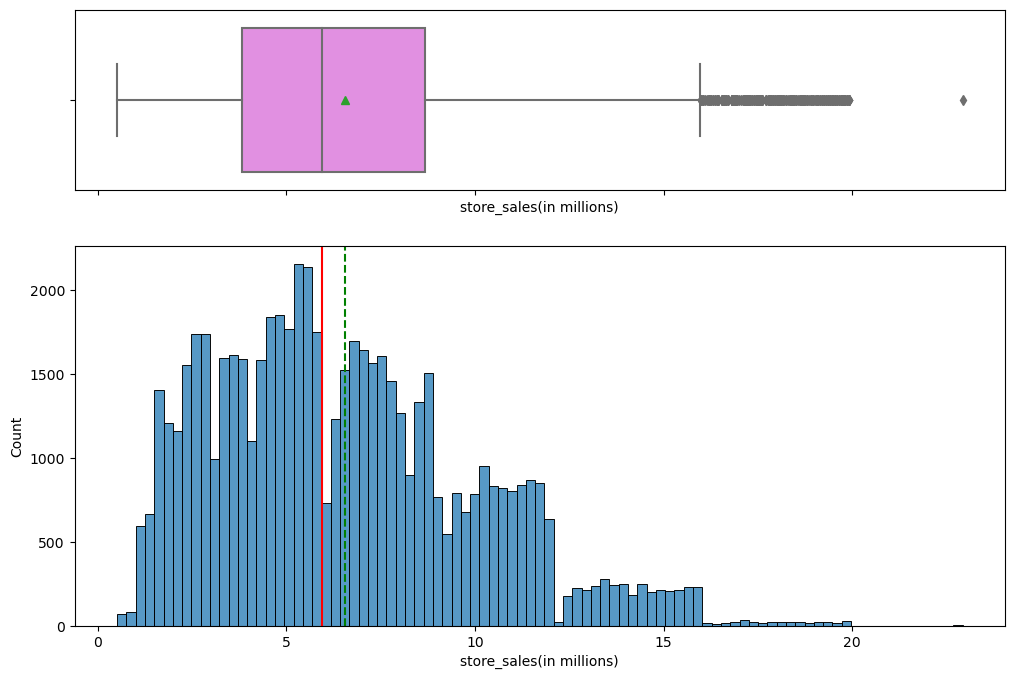

In [16]:
# store_sales(in millions) variable

histogram_boxplot(data, 'store_sales(in millions)')

## **Observation:** 
-  <font size = '4'> The distribution is right skewness and there are outliers in upper side. <font/>
-  <font size = '4'> Mean value is greater than Median.<font/>
-  <font size = '4'> The median of Store Sales are 6.4.<font/>

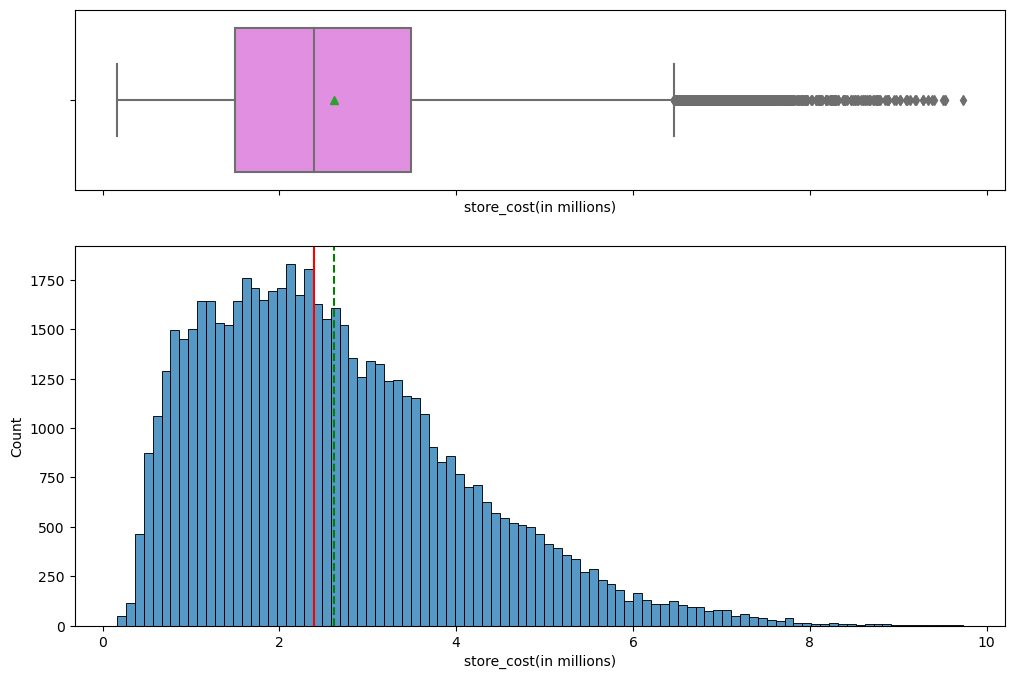

In [17]:
# store_cost(in millions) variable

histogram_boxplot(data, 'store_cost(in millions)')

## **Observation:** 

-  <font size = '4'> The distribution is right skewed and there are oulier to upper side.<font/>
-  <font size = '4'> Mean values is higher than median value.<font/>
-  <font size = '4'> The median of store cost is 2.7.<font/>

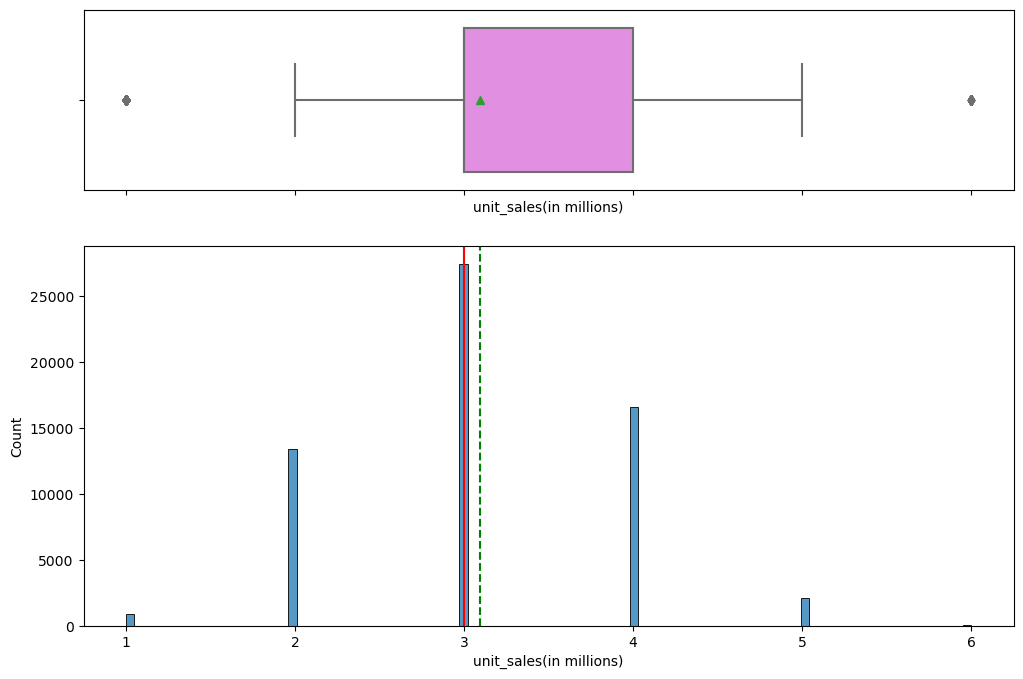

In [18]:
# unit_sales(in millions) variable

histogram_boxplot(data, 'unit_sales(in millions)')

## **Observation:** 

-  <font size = '4'> The distribution is left skewed and there are oulier to upper side and lower side.<font/>
-  <font size = '4'> The median of unit sales is 3.3.<font/>

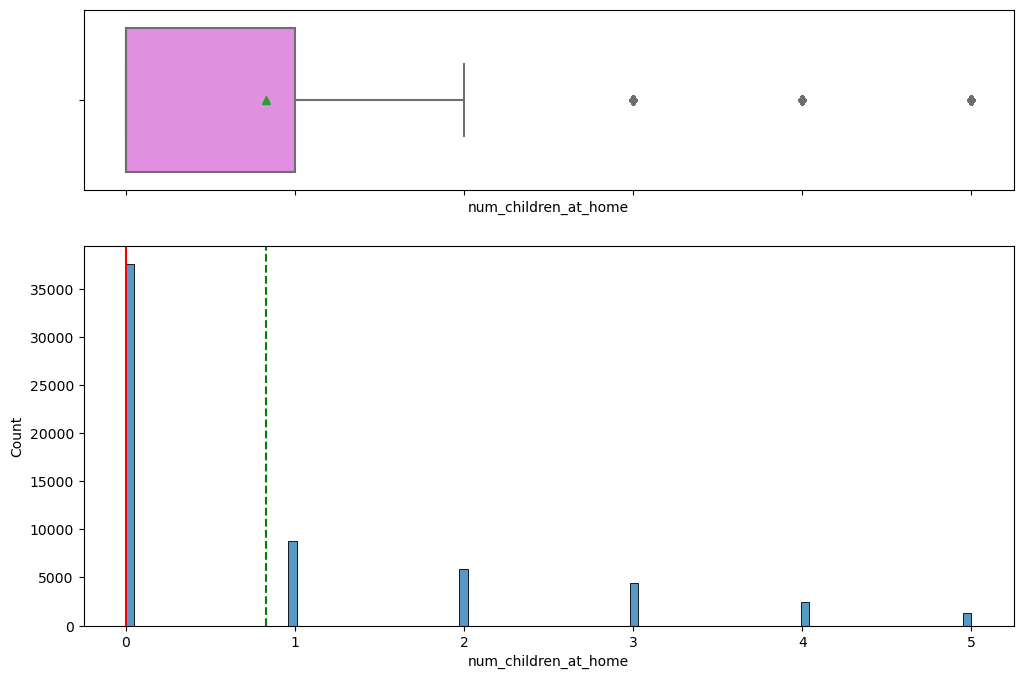

In [20]:
# num_children_at_home variable

histogram_boxplot(data, 'num_children_at_home')

## **Observation:** 

-  <font size = '4'> The distribution is right skewed and there are oulier to upper side.<font/>
-  <font size = '4'> Mean values is higher than median value.<font/>
-  <font size = '4'> The median of num_children_at_home is 0.98.<font/>

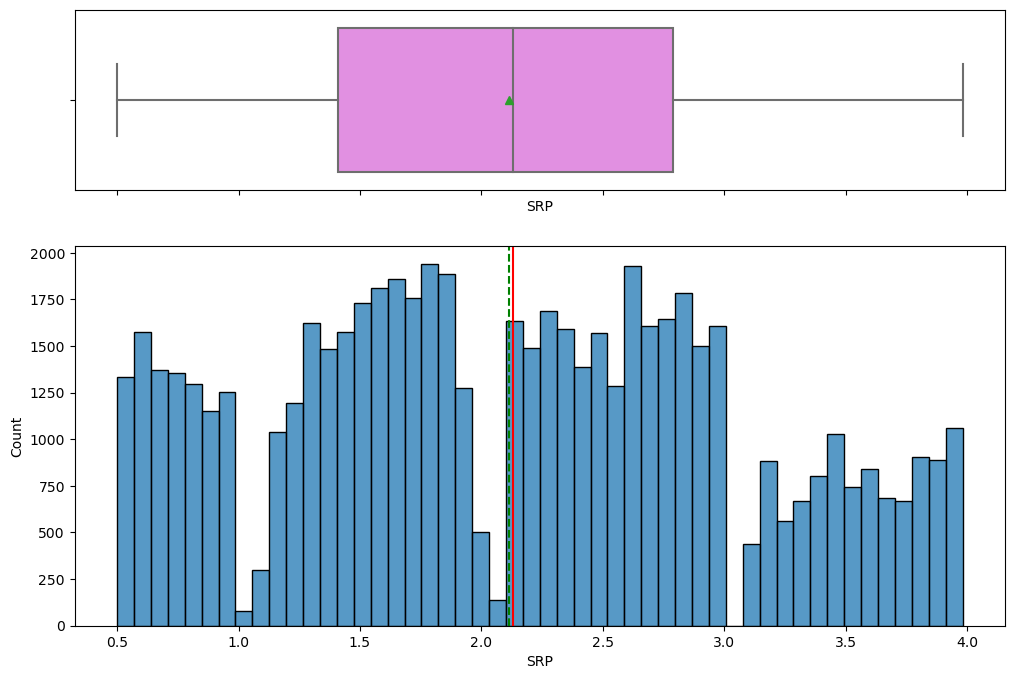

In [21]:
# SRP variable

histogram_boxplot(data, 'SRP')

## **Observation:** 

-  <font size = '4'> The distribution is mean and median both are same.<font/>

-  <font size = '4'> The median of SRP is 2.2.<font/>

#                                                    THE END 